# Import Libraries

In [31]:
import yfinance as yf
import pandas as pd
from ta import add_all_ta_features
from ta.utils import dropna
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import ta
#import talib
from fracdiff.sklearn import Fracdiff, FracdiffStat
import numpy as np


# Download data

In [32]:
aapl = yf.download('AAPL', start='2018-01-01', end='2024-01-01')

c:\Conda\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


In [33]:
sp500 = yf.download('^GSPC', start='2018-01-01', end='2024-01-01')

# Align AAPL data with S&P 500 data
aapl['SP500'] = sp500['Close'].reindex(aapl.index).fillna(method='ffill')
aapl['SP500_diff'] = aapl['SP500'].diff()


c:\Conda\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed
C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16892\859413952.py:4: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  aapl['SP500'] = sp500['Close'].reindex(aapl.index).fillna(method='ffill')


In [34]:
"""aapl = pd.read_csv('AAPL_dollar_bars_1516_100M.csv')
aapl.drop(columns="start_date",inplace=True)
aapl.drop(columns="end_date",inplace=True)
aapl.drop(columns="start_time",inplace=True)
aapl.drop(columns="end_time",inplace=True)"""

'aapl = pd.read_csv(\'AAPL_dollar_bars_1516_100M.csv\')\naapl.drop(columns="start_date",inplace=True)\naapl.drop(columns="end_date",inplace=True)\naapl.drop(columns="start_time",inplace=True)\naapl.drop(columns="end_time",inplace=True)'

# Adding Technnical Indicators

In [35]:
aapl = add_all_ta_features(
    aapl, open="Open", high="High", low="Low", close="Close", volume="Volume", fillna=True)

c:\Conda\Lib\site-packages\ta\trend.py:1030: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self._psar[i] = high2


In [36]:
import pandas_ta
aapl['Supertrend7_3'] = pandas_ta.supertrend(aapl['High'], aapl['Low'], aapl['Close'], length=7, multiplier=3)['SUPERT_7_3.0']
aapl['Supertrend10_3'] = pandas_ta.supertrend(aapl['High'], aapl['Low'], aapl['Close'], length=10, multiplier=3)['SUPERT_10_3.0']

In [37]:
aapl['trend_sma_fast-close'] = aapl['trend_sma_fast'] - aapl['Close']
aapl['trend_sma_slow-close'] = aapl['trend_sma_slow'] - aapl['Close']
aapl['trend_ema_fast-close'] = aapl['trend_ema_fast'] - aapl['Close']
aapl['trend_ema_slow-close'] = aapl['trend_ema_slow'] - aapl['Close']
aapl['volatility_bbm-close'] = aapl['volatility_bbm'] - aapl['Close']
aapl['volatility_bbh-close'] = aapl['volatility_bbh'] - aapl['Close']
aapl['volatility_bbl-close'] = aapl['volatility_bbl'] - aapl['Close']
aapl['Supertrend7_3-close'] = aapl['Supertrend7_3'] - aapl['Close']
aapl['Supertrend10_3-close'] = aapl['Supertrend10_3'] - aapl['Close']

C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16892\1269999952.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl['Supertrend10_3-close'] = aapl['Supertrend10_3'] - aapl['Close']


# Data Labelling

In [38]:
aapl["Tomorrow"] = aapl["Close"].shift(-1)
aapl['diff'] = aapl['Close'].diff()
aapl["Target"] = (aapl["Tomorrow"]> aapl["Close"]).astype(int)

C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16892\1424326882.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl["Tomorrow"] = aapl["Close"].shift(-1)
C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16892\1424326882.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl['diff'] = aapl['Close'].diff()
C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16892\1424326882.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  

In [39]:
aapl.dropna(inplace=True)

In [40]:
labels = aapl['Target'].tolist()
aapl.drop(columns="Target",inplace=True)
aapl.drop(columns="Tomorrow",inplace=True)

In [41]:
len(aapl)

1498

# Data Preprocessing

In [42]:
# Initialize the Fracdiff object
fd = FracdiffStat()

"""# Apply fractional differencing to the 'Close' price
aapl['Close_fdiff'] = fd.fit_transform(aapl[['Close']].values)"""

"# Apply fractional differencing to the 'Close' price\naapl['Close_fdiff'] = fd.fit_transform(aapl[['Close']].values)"

In [43]:
for indicator in aapl.columns:
    prob = adfuller(aapl[indicator])[1]
    print(indicator, prob)
    if prob > 0.05 and indicator != "Tomorrow" and indicator != "Target":
        fdindicator = indicator + '_fdiff'
        #pctindicator = indicator + '_pctdiff'
        aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)
        #aapl[pctindicator] = aapl[indicator].pct_change()
        aapl.drop(columns=indicator, inplace=True)

#aapl.dropna(inplace=True)
aapl = aapl.iloc[1:]

Open 0.9026546793909713


C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16892\745939167.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)


High 0.8810522634620366


C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16892\745939167.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)


Low 0.894058797790726


C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16892\745939167.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)


Close 0.888791907757907


C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16892\745939167.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)


Adj Close 0.8957100461048948


C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16892\745939167.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)


Volume 7.396591038601194e-05
SP500 0.8081154968880498


C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16892\745939167.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)


SP500_diff 4.684104127988681e-22
volume_adi 0.9331536427653389


C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16892\745939167.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)


volume_obv 0.260674690303392


C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16892\745939167.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)


volume_cmf 9.653954852013076e-06
volume_fi 9.327385027391376e-13
volume_em 3.2590238531855314e-28
volume_sma_em 3.2485099302949837e-11
volume_vpt 0.5507849883515203


C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16892\745939167.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)


volume_vwap 0.8655713876214615


C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16892\745939167.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)


volume_mfi 2.824963174026137e-10
volume_nvi 0.9502988379225977


C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16892\745939167.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)
C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16892\745939167.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)


volatility_bbm 0.8929898393288129
volatility_bbh 0.8636643193662945


C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16892\745939167.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)


volatility_bbl 0.925576386742542
volatility_bbw 2.803596211363109e-05


C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16892\745939167.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)


volatility_bbp 6.576456216395831e-16
volatility_bbhi 0.0
volatility_bbli 6.5246582177397044e-24
volatility_kcc 0.876969841751418


C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16892\745939167.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)


volatility_kch 0.8740723928209121
volatility_kcl 0.8891523814189044


C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16892\745939167.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)
C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16892\745939167.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)


volatility_kcw 0.0014507262813723636
volatility_kcp 5.309706986320345e-15
volatility_kchi 1.7157756912036224e-27
volatility_kcli 1.5296652701648152e-20
volatility_dcl 0.8943366591735717


C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16892\745939167.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)


volatility_dch 0.8778237813387066
volatility_dcm 0.8925232173546458


C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16892\745939167.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)
C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16892\745939167.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)


volatility_dcw 0.00015261818926468355
volatility_dcp 3.1326338297311326e-14
volatility_atr 0.06524078497102863


C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16892\745939167.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)


volatility_ui 6.407129716319792e-07
trend_macd 3.89189383850168e-08
trend_macd_signal 2.0927032212810973e-08
trend_macd_diff 9.352101455543011e-15
trend_sma_fast 0.9236592075299306


C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16892\745939167.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)
C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16892\745939167.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)


trend_sma_slow 0.9289533248801554
trend_ema_fast 0.9051626211146737


C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16892\745939167.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)
C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16892\745939167.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)


trend_ema_slow 0.9105536847457855
trend_vortex_ind_pos 1.4684128684795517e-09
trend_vortex_ind_neg 1.7491879746678383e-08
trend_vortex_ind_diff 4.992109609768858e-10
trend_trix 1.4562847716824562e-07
trend_mass_index 3.5486329544181396e-06
trend_dpo 1.263479886626841e-25
trend_kst 3.510878280556135e-08
trend_kst_sig 2.1965871938380687e-06
trend_kst_diff 6.641282845709394e-14
trend_ichimoku_conv 0.8904289339811483


C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16892\745939167.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)


trend_ichimoku_base 0.9017299727219157


C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16892\745939167.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)


trend_ichimoku_a 0.8520907954878154


C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16892\745939167.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)
C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16892\745939167.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)


trend_ichimoku_b 0.8789657950329461
trend_stc 5.592689888917978e-18
trend_adx 2.106203037187186e-07
trend_adx_pos 6.10803002251858e-11
trend_adx_neg 2.608632022744189e-11
trend_cci 2.3713689814988694e-14
trend_visual_ichimoku_a 0.9193162100823954


C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16892\745939167.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)
C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16892\745939167.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)


trend_visual_ichimoku_b 0.9494213382348998
trend_aroon_up 1.767377357773123e-10
trend_aroon_down 1.2225121868233566e-10
trend_aroon_ind 8.763835339848165e-08
trend_psar_up 0.9032242092837122


C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16892\745939167.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)
C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16892\745939167.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)


trend_psar_down 0.8872930668107581
trend_psar_up_indicator 1.4152872718811121e-21
trend_psar_down_indicator 3.1605475885702098e-19
momentum_rsi 1.3840456653511657e-10
momentum_stoch_rsi 4.160715282789148e-15
momentum_stoch_rsi_k 9.833766890664323e-11
momentum_stoch_rsi_d 2.3979422481399566e-12
momentum_tsi 2.4460085198922302e-08
momentum_uo 8.868417897022272e-09
momentum_stoch 1.7762051846308611e-19
momentum_stoch_signal 2.7678489511298783e-07
momentum_wr 1.776205184630874e-19
momentum_ao 5.504904023867824e-09
momentum_roc 4.631947294301581e-07
momentum_ppo 6.464895302871311e-07
momentum_ppo_signal 2.6983784826205036e-07
momentum_ppo_hist 1.1584214558716114e-14
momentum_pvo 1.7721555753638353e-16
momentum_pvo_signal 3.49304247674623e-14
momentum_pvo_hist 3.454391583066908e-21
momentum_kama 0.8649361729617651


C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16892\745939167.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)


others_dr 9.544252662317374e-23
others_dlr 1.543280328761861e-22
others_cr 0.888791907757905


C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16892\745939167.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)


Supertrend7_3 0.9018817877722602
Supertrend10_3 0.9025726102981813


C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16892\745939167.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)
C:\Users\Adrian Yau\AppData\Local\Temp\ipykernel_16892\745939167.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  aapl[fdindicator] = fd.fit_transform(aapl[[indicator]].values)


trend_sma_fast-close 2.266186567142866e-15
trend_sma_slow-close 1.9669061893705585e-11
trend_ema_fast-close 5.455033617734016e-22
trend_ema_slow-close 6.832032725049998e-13
volatility_bbm-close 1.1501882853373797e-13
volatility_bbh-close 2.653804198501898e-05
volatility_bbl-close 6.4681619202117076e-12
Supertrend7_3-close 2.5827201760084027e-10
Supertrend10_3-close 2.6840579229584777e-10
diff 0.0


In [44]:
aapl.columns

Index(['Volume', 'SP500_diff', 'volume_cmf', 'volume_fi', 'volume_em',
       'volume_sma_em', 'volume_mfi', 'volatility_bbw', 'volatility_bbp',
       'volatility_bbhi',
       ...
       'trend_ichimoku_a_fdiff', 'trend_ichimoku_b_fdiff',
       'trend_visual_ichimoku_a_fdiff', 'trend_visual_ichimoku_b_fdiff',
       'trend_psar_up_fdiff', 'trend_psar_down_fdiff', 'momentum_kama_fdiff',
       'others_cr_fdiff', 'Supertrend7_3_fdiff', 'Supertrend10_3_fdiff'],
      dtype='object', length=106)

In [45]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(aapl)

# Creating Sequences for LSTM

In [46]:
sequence_length = 20

# Function to create sequences
def create_sequences(data, labels, seq_length):
    xs = []
    ys = []

    for i in range(len(data)-seq_length):
        x = data[i:(i+seq_length)]
        y = labels[i+seq_length]
        xs.append(x)
        ys.append(y)
    
    return np.array(xs), np.array(ys)


X_all, y_all = create_sequences(data_scaled, labels, sequence_length)

# Calculate the index for the split, for example 80% for training
split_idx = int(len(X_all) * 0.5)

# Split the data into training and test sets
X_train = X_all[:split_idx]
y_train = y_all[:split_idx]
X_test = X_all[split_idx:]
y_test = y_all[split_idx:]

In [47]:
test_length = len(X_test)

# DataLoader for LSTM 

In [48]:
import torch
from torch.utils.data import Dataset, DataLoader

class StockDataset(Dataset):
    def __init__(self, features, labels):
        self.features = features
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        return self.features[idx], self.labels[idx]
    
# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)

# Create the dataset
traindataset = StockDataset(X_train_tensor, y_train_tensor)

# Create the DataLoader
trainLoader = DataLoader(traindataset, batch_size=32, shuffle=False)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# Create the dataset
testdataset = StockDataset(X_test_tensor, y_test_tensor)

# Create the DataLoader
testLoader = DataLoader(testdataset, batch_size=32, shuffle=False)

In [49]:
len(aapl)

1497

# LSTM Model Training

In [50]:
import torch.nn as nn

class StockPredictor(nn.Module):
    def __init__(self, num_features, hidden_units, num_layers, dropout_prob=0.5):
        super(StockPredictor, self).__init__()
        self.lstm = nn.LSTM(num_features, hidden_units, num_layers, batch_first=True,dropout=dropout_prob)
        self.fc = nn.Linear(hidden_units, 1)

    def forward(self, x):
        _, (h_n, _) = self.lstm(x)
        out = self.fc(h_n[-1])
        return torch.sigmoid(out)

# Define the model
num_features = X_train.shape[-1]  # Number of features
hidden_units = 200  # Number of hidden units
num_layers = 2  # Number of LSTM layers



In [51]:
"""model = StockPredictor(num_features, hidden_units, num_layers)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

minLossModel = StockPredictor(num_features, hidden_units, num_layers)
# Training loop
num_epochs = 150
min_loss = 1
epochLoss = []
for epoch in range(num_epochs):
    model.train()
    for features, labels in trainLoader:
        # Forward pass
        predictions = model(features).squeeze()
        loss = criterion(predictions, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    epochLoss.append(loss.item())
    if loss.item() < min_loss:
        min_loss = loss.item()
        minLossModel = model

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, minimum Loss: {min_loss:.4f}')
"""


"model = StockPredictor(num_features, hidden_units, num_layers)\n\n# Define loss function and optimizer\ncriterion = nn.BCELoss()\noptimizer = torch.optim.Adam(model.parameters(), lr=0.0001)\n\nminLossModel = StockPredictor(num_features, hidden_units, num_layers)\n# Training loop\nnum_epochs = 150\nmin_loss = 1\nepochLoss = []\nfor epoch in range(num_epochs):\n    model.train()\n    for features, labels in trainLoader:\n        # Forward pass\n        predictions = model(features).squeeze()\n        loss = criterion(predictions, labels)\n\n        # Backward pass and optimization\n        optimizer.zero_grad()\n        loss.backward()\n        optimizer.step()\n\n    epochLoss.append(loss.item())\n    if loss.item() < min_loss:\n        min_loss = loss.item()\n        minLossModel = model\n\n    if (epoch+1) % 10 == 0:\n        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, minimum Loss: {min_loss:.4f}')\n"

In [52]:
model = StockPredictor(num_features, hidden_units, num_layers)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

minLossModel = StockPredictor(num_features, hidden_units, num_layers,dropout_prob=0.5)
# Training loop
num_epochs = 200
min_loss = 1
trainepochLoss = []
testepochLoss = []

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    for features, labels in trainLoader:
        # Forward pass
        predictions = model(features).squeeze()
        loss = criterion(predictions, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    trainepochLoss.append(loss.item())
    # After each epoch, evaluate on the validation set
    model.eval()  # Set the model to evaluation mode
    validation_loss = 0.0
    
    with torch.no_grad():
        for features, labels in testLoader:
            predictions = model(features).squeeze()
            val_loss = criterion(predictions, labels)
            validation_loss += val_loss.item()

    validation_loss /= len(testLoader)  # Get the average loss over the validation set
    testepochLoss.append(validation_loss)

    if validation_loss < min_loss:
        min_loss = validation_loss
        minLossModel = model  # You might want to clone the model here to avoid referencing the same model

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Training Loss: {loss.item():.4f}, Validation Loss: {validation_loss:.4f}, Minimum Validation Loss: {min_loss:.4f}')

Epoch [10/200], Training Loss: 0.5214, Validation Loss: 0.7009, Minimum Validation Loss: 0.6923
Epoch [20/200], Training Loss: 0.3233, Validation Loss: 0.7277, Minimum Validation Loss: 0.6923
Epoch [30/200], Training Loss: 0.1088, Validation Loss: 0.7562, Minimum Validation Loss: 0.6923
Epoch [40/200], Training Loss: 0.0781, Validation Loss: 0.7670, Minimum Validation Loss: 0.6923
Epoch [50/200], Training Loss: 0.0337, Validation Loss: 0.7649, Minimum Validation Loss: 0.6923
Epoch [60/200], Training Loss: 0.0497, Validation Loss: 0.7682, Minimum Validation Loss: 0.6923
Epoch [70/200], Training Loss: 0.0057, Validation Loss: 0.8839, Minimum Validation Loss: 0.6923
Epoch [80/200], Training Loss: 0.0109, Validation Loss: 0.7735, Minimum Validation Loss: 0.6923
Epoch [90/200], Training Loss: 0.0168, Validation Loss: 0.8320, Minimum Validation Loss: 0.6923
Epoch [100/200], Training Loss: 0.0217, Validation Loss: 0.7944, Minimum Validation Loss: 0.6923
Epoch [110/200], Training Loss: 0.0047,

In [53]:
## Extra epochs
"""
num_epochs = 200
for epoch in range(num_epochs):
    for features, labels in trainLoader:
        # Forward pass
        predictions = model(features).squeeze()
        loss = criterion(predictions, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    epochLoss.append(loss.item())
    if loss.item() < min_loss:
        min_loss = loss.item()
        minLossModel = model

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, minimum Loss: {min_loss:.4f}')

"""

"\nnum_epochs = 200\nfor epoch in range(num_epochs):\n    for features, labels in trainLoader:\n        # Forward pass\n        predictions = model(features).squeeze()\n        loss = criterion(predictions, labels)\n\n        # Backward pass and optimization\n        optimizer.zero_grad()\n        loss.backward()\n        optimizer.step()\n\n    epochLoss.append(loss.item())\n    if loss.item() < min_loss:\n        min_loss = loss.item()\n        minLossModel = model\n\n    if (epoch+1) % 10 == 0:\n        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, minimum Loss: {min_loss:.4f}')\n\n"

# Evaluation

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,roc_curve, roc_auc_score

model.eval()  # Set the model to evaluation mode

# Store probabilities, predictions and actuals
probabilities = []
predictions = []
actuals = []

with torch.no_grad():  # No need to track the gradients
    for features, labels in testLoader:
        # Forward pass to get output/prediction
        outputs = model(features).squeeze()

        # Since we're using sigmoid, we will round the outputs to get the binary class
        predicted_classes = torch.round(outputs)
        
        if predicted_classes.ndim == 0:
            predicted_classes = predicted_classes.unsqueeze(0)

        # Store predictions and actual labels
        probabilities.extend(outputs.cpu().numpy())
        predictions.extend(predicted_classes.cpu().numpy())
        actuals.extend(labels.cpu().numpy())

# Convert lists to numpy arrays for evaluation
probabilities_array = np.array(probabilities)
predictions_array = np.array(predictions)
actuals_array = np.array(actuals)

# Calculate various classification metrics
accuracy = accuracy_score(actuals_array, predictions_array)
precision = precision_score(actuals_array, predictions_array)
recall = recall_score(actuals_array, predictions_array)
f1 = f1_score(actuals_array, predictions_array)
conf_matrix = confusion_matrix(actuals_array, predictions_array)
auc_score = roc_auc_score(actuals_array, probabilities_array)

# Print out the metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'AUC Score: {auc_score:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.4980
Precision: 0.5430
Recall: 0.2135
F1 Score: 0.3065
AUC Score: 0.4879
Confusion Matrix:
[[286  69]
 [302  82]]


In [55]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,roc_curve, roc_auc_score

minLossModel.eval()  # Set the minLossModel to evaluation mode

# Store probabilities, predictions and actuals
probabilities = []
predictions = []
actuals = []

with torch.no_grad():  # No need to track the gradients
    for features, labels in testLoader:
        # Forward pass to get output/prediction
        outputs = minLossModel(features).squeeze()

        # Since we're using sigmoid, we will round the outputs to get the binary class
        predicted_classes = torch.round(outputs)
        
        if predicted_classes.ndim == 0:
            predicted_classes = predicted_classes.unsqueeze(0)

        # Store predictions and actual labels
        probabilities.extend(outputs.cpu().numpy())
        predictions.extend(predicted_classes.cpu().numpy())
        actuals.extend(labels.cpu().numpy())

# Convert lists to numpy arrays for evaluation
probabilities_array = np.array(probabilities)
predictions_array = np.array(predictions)
actuals_array = np.array(actuals)

# Calculate various classification metrics
accuracy = accuracy_score(actuals_array, predictions_array)
precision = precision_score(actuals_array, predictions_array)
recall = recall_score(actuals_array, predictions_array)
f1 = f1_score(actuals_array, predictions_array)
conf_matrix = confusion_matrix(actuals_array, predictions_array)
auc_score = roc_auc_score(actuals_array, probabilities_array)

# Print out the metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'AUC Score: {auc_score:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')

Accuracy: 0.4980
Precision: 0.5430
Recall: 0.2135
F1 Score: 0.3065
AUC Score: 0.4879
Confusion Matrix:
[[286  69]
 [302  82]]


In [56]:
predictions_array30 = predictions_array[:30]
actuals_array30 = actuals_array[:30]

# Calculate various classification metrics
accuracy = accuracy_score(actuals_array30, predictions_array30)
precision = precision_score(actuals_array30, predictions_array30)
recall = recall_score(actuals_array30, predictions_array30)
f1 = f1_score(actuals_array30, predictions_array30)
conf_matrix = confusion_matrix(actuals_array30, predictions_array30)

# Print out the metrics
print("Evaluation for the  first 30 samples:")
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')

Evaluation for the  first 30 samples:
Accuracy: 0.6667
Precision: 0.6667
Recall: 0.3333
F1 Score: 0.4444
Confusion Matrix:
[[16  2]
 [ 8  4]]


# Loss Curve

Text(0, 0.5, 'loss')

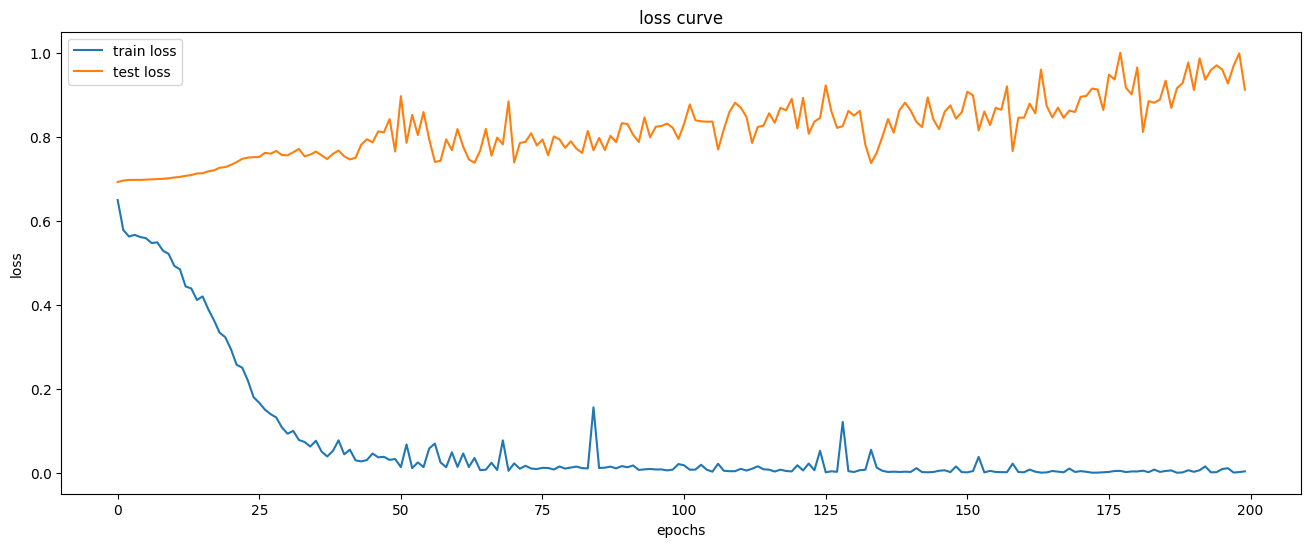

In [57]:
plt.figure(figsize=(16,6))
plt.plot(trainepochLoss)
plt.plot(testepochLoss)
plt.legend(['train loss', 'test loss'], loc='upper left')
plt.title("loss curve")
plt.xlabel('epochs')
plt.ylabel('loss')

In [58]:

probabilities_array = np.array(probabilities)

predictions_array = (probabilities_array > 0.5).astype(int)
actuals_array = np.array(actuals)

# Download AAPL closing prices
#aapl_closing = yf.download('AAPL', start='2018-01-01', end='2024-01-01')["Close"]
aapl_closing = pd.read_csv('AAPL_dollar_bars1516.csv')['Close']

# Focus on the last 5% of the period
last_five_percent = aapl_closing.tail(test_length+1)

# Calculate daily returns for the last 5%
actuals_daily_returns = np.diff(last_five_percent.values) / last_five_percent.values[:-1]

# Ensure 'signals' is aligned in size with 'actuals_daily_returns'
# This might involve slicing 'predictions_array' to match the exact period of 'last_five_percent'
signals = predictions_array[-len(actuals_daily_returns):]  # Adjust this line as necessary

# Calculate strategy daily returns
strategy_daily_returns = signals * actuals_daily_returns

# Calculate performance metrics
cumulative_return = np.prod(strategy_daily_returns + 1) - 1
negative_returns = strategy_daily_returns[strategy_daily_returns < 0]
downside_deviation = np.sqrt(np.mean(negative_returns ** 2))
expected_return = np.mean(strategy_daily_returns)
risk_free_rate = 0  # Adjust as necessary
sortino_ratio = (expected_return - risk_free_rate) / downside_deviation if downside_deviation != 0 else np.nan

# Display Performance Metrics
print("\nTrading Strategy Performance:")
print(f"Cumulative Return: {cumulative_return * 100:.2f}%")
print(f"Downside Deviation: {downside_deviation:.4f}")
print(f"Sortino Ratio: {sortino_ratio:.4f}")


Trading Strategy Performance:
Cumulative Return: 12.41%
Downside Deviation: 0.0095
Sortino Ratio: 0.0182


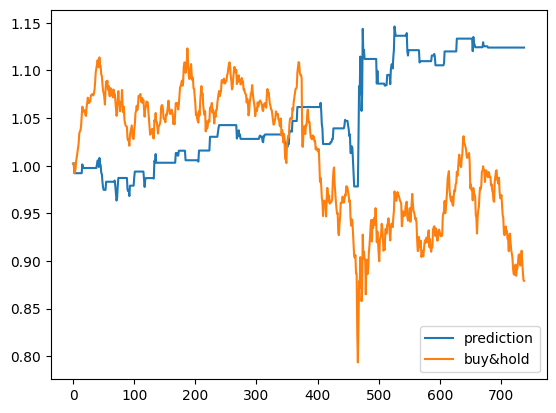

In [59]:
plt.plot((strategy_daily_returns+1).cumprod())
plt.plot((actuals_daily_returns+1).cumprod())
plt.legend(['prediction', 'buy&hold'], loc='lower right')

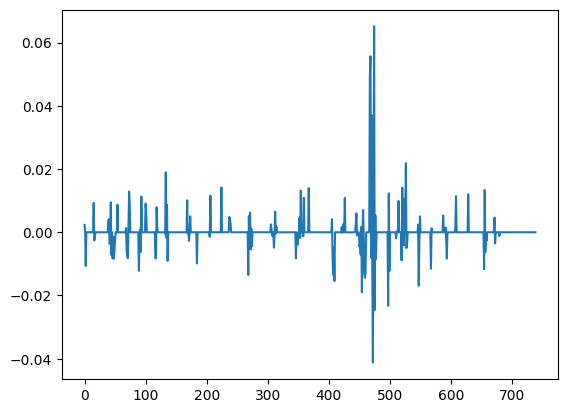

In [60]:
plt.plot(strategy_daily_returns)